In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('../data/processed_data.csv')

In [3]:
df.head()

,slashRatio,pathLength,hostnameLength,hyphenRatio,specialcaractersRatio,nb_slash,nb_specialcaracters,nb_hyphen,nb_letters,numbersToLettersRatio,...,bayesProba,numbersRatio,nb_numbers,label,pathLengthRatio,urlEntropy,dotRatio,hostnameLengthRatio,length,nb_dot
0,0.799800,0.491491,0.725225,0.726727,0.983984,0.821822,0.902903,0.727728,0.503003,0.711211,...,0.759786,0.685185,0.688689,1,0.400723,0.844238,0.114114,0.506006,0.624625,0.172673
1,0.305806,0.347347,0.590090,0.000000,0.599099,0.215215,0.294795,0.000000,0.171672,0.871872,...,0.395702,0.870370,0.738238,0,0.362362,0.507508,0.325325,0.719219,0.240741,0.172673
2,0.423423,0.810310,0.590090,0.000000,0.551051,0.643644,0.797297,0.000000,0.833333,0.000000,...,0.830645,0.000000,0.000000,1,0.771772,0.738287,0.912240,0.260260,0.793293,0.981481
3,0.000000,0.000000,0.845345,0.827327,0.329329,0.000000,0.192192,0.727728,0.199199,0.806807,...,0.687105,0.815816,0.688689,1,0.000000,0.169169,0.819820,1.000000,0.216717,0.550551
4,0.229730,0.507508,0.324324,0.000000,0.157658,0.215215,0.192192,0.000000,0.453453,0.000000,...,0.459459,0.000000,0.000000,0,0.573073,0.411555,0.646146,0.472472,0.392392,0.550551


In [ ]:
# 'label' is the target column
cols = [
                'hyphenRatio',
                'nb_dot',
                'length',
                'pathLengthRatio',
                'urlEntropy',
                'slashRatio',
                'numbersToLettersRatio',
                'numbersRatio',
                'hostnameLength',
                'nb_specialcaracters',
                'nb_hyphen',
                'bayesProba',
                'dotRatio',
                'nb_letters',
                'nb_slash',
                'lettersRatio',
                'specialcaractersRatio',
                'hostnameLengthRatio',
                'nb_numbers',
                'pathLength'
        ]

X_train, X_test, y_train, y_test = train_test_split(df[cols], df['label'], test_size=0.2, random_state=42)

print(f"Train: {round(len(X_train)/len(df)*100)}%\nTest: {round(len(X_test)/len(df)*100)}%")

Train: 80%
Test: 20%


# Train

In [5]:
#Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [6]:
# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],          # Number of trees
    'max_depth': list(range(2,20)),               # Maximum depth of trees
    'min_samples_split': list(range(2,20)),       # Minimum samples required to split an internal node
    'min_samples_leaf': list(range(1,20)),        # Minimum samples required to be a leaf node
    'max_features': uniform(0.1, 0.9)         # Fraction of features to consider for splitting
}

In [7]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=3,  # Number of parameter combinations to try
    scoring='accuracy',  # Use accuracy for evaluation
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [ ]:
# Perform the random search
random_search.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best parameters found: ", random_search.best_params_)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


# Test

In [ ]:
# Test the model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.9901220533684336
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     89157
           1       0.99      0.99      0.99     77983

    accuracy                           0.99    167140
   macro avg       0.99      0.99      0.99    167140
weighted avg       0.99      0.99      0.99    167140

Test Confusion Matrix:
 [[88389   768]
 [  883 77100]]


# Features Importance

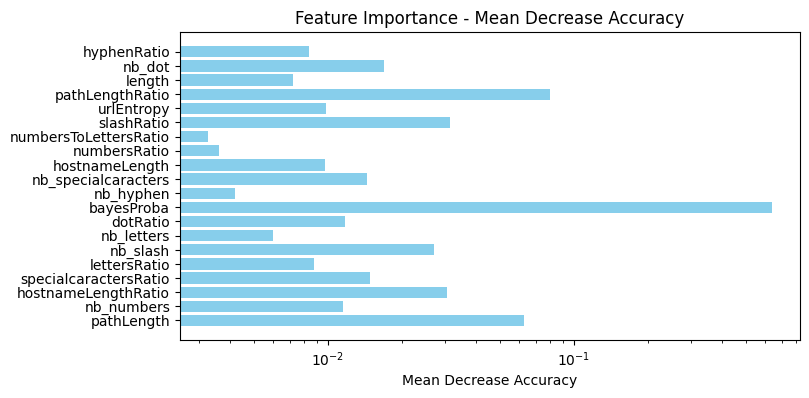

In [ ]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(rf_model.feature_names_in_, rf_model.feature_importances_, color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.gca().invert_yaxis() 
plt.xscale('log')
plt.show()

In [ ]:
joblib.dump(rf_model,'../models_saved/random_forest.joblib')

['../models_saved/random_forest.joblib']